# **Predicting and Classifying with Regularized Regression Models**

# **Part 2 – Classification (Logistic Regression)**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 1.Preprocessing

In [2]:
# Load Dataset 
df = pd.read_csv("D:\DEPI3\Machine Learning\Breast Cancer Wisconsin Diagnostic.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_6284\4158833742.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DEPI3\Machine Learning\Breast Cancer Wisconsin Diagnostic.csv")


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Drop unnecessary columns (id, unnamed index)
df = df.drop(columns=["id", "Unnamed: 32"])

# Map target (M = malignant, B = benign)
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})

# Features / Target
X = df.drop(columns=["diagnosis"], axis=1)
y = df["diagnosis"]

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 2.Model Building

In [6]:
# Train a Logistic Regression model with L2 regularization.
# Try at least three different values of the regularization parameter C (inverse of λ).
results_clf = {}
for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(penalty="l2" , C=C , solver="liblinear")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    results_clf[f"L2 C={C}"] = {
        "Accuracy" : accuracy_score(y_test,y_pred),
        "Precision" : precision_score(y_test,y_pred),
        "Recall" : recall_score(y_test,y_pred),
        "F1" : f1_score(y_test,y_pred),
        "ROC_AUC" : roc_auc_score(y_test,y_prob)
    }
    
pd.DataFrame(results_clf)

,L2 C=0.01,L2 C=0.1,L2 C=1,L2 C=10
Accuracy,0.982456,0.982456,0.982456,0.982456
Precision,1.000000,1.000000,1.000000,1.000000
Recall,0.953488,0.953488,0.953488,0.953488
F1,0.976190,0.976190,0.976190,0.976190
ROC_AUC,0.998690,0.998690,0.997380,0.996397


# 3.Evaluation

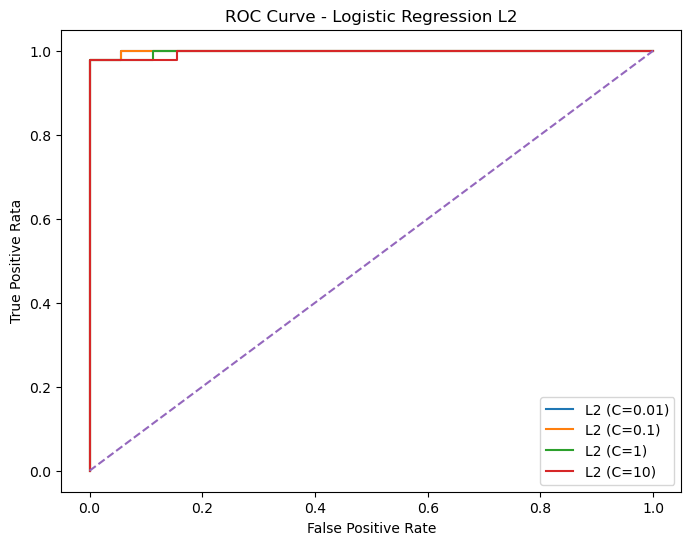

In [7]:
# Compare accuracy, precision, recall, F1-score, and ROC-AUC.
# Plot the ROC curve.
plt.figure(figsize=(8,6))
for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(penalty="l2", C=C, solver="liblinear")
    model.fit(X_train,y_train)
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr,_ = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=f"L2 (C={C})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rata")
plt.title("ROC Curve - Logistic Regression L2")
plt.legend()
plt.show()

In [8]:
for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(penalty="l1", C=C, solver="liblinear")
    model.fit(X_train, y_train)
    coefs = model.coef_[0]
    nonzero = np.sum(coefs != 0)
    print(f"C={C}: Non-zero coefficients = {nonzero} / {len(coefs)}")

C=0.01: Non-zero coefficients = 3 / 30
C=0.1: Non-zero coefficients = 8 / 30
C=1: Non-zero coefficients = 15 / 30
C=10: Non-zero coefficients = 22 / 30


## Short Report — Regularization Insights

- **Breast Cancer Classification**:
  - Logistic Regression with L2 achieves high accuracy and ROC-AUC.
  - L1 Logistic Regression highlights the most important predictive features by eliminating weaker ones.
  - Strong regularization (small C) increases sparsity but may lower accuracy.